In [71]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

datapath = '../res/Datas/Test/examination.csv'
# datapath = '../res/Datas/Test/questionnaire.csv'
df = pd.read_csv(datapath)
# print(df.mean(axis=0))
df = df.fillna(df.mean(axis=0).to_dict(), axis=0)
df
df = df._get_numeric_data()
df
df.dropna()
df

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,57.828125,105.534931,1.000000,4.000000,86.000000,1.0,1.000000,...,2.000000,1.00000,1.000000,1.000000,4.000000,62.000000,1.000000,31.526348,1.199008,1.000000
1,73558,1,766.0,57.828125,105.534931,1.000000,4.000000,74.000000,1.0,1.000000,...,3.000000,1.00000,2.000000,3.000000,4.000000,28.000000,1.000000,31.526348,1.199008,1.000000
2,73559,1,665.0,57.828125,105.534931,1.000000,4.000000,68.000000,1.0,1.000000,...,2.000000,1.00000,2.000000,3.000000,4.000000,49.000000,1.000000,31.526348,1.199008,3.000000
3,73560,1,803.0,57.828125,105.534931,1.000000,2.000000,64.000000,1.0,1.000000,...,2.815625,1.14517,2.155726,2.992327,3.751066,55.746708,1.066458,31.526348,1.199008,1.709075
4,73561,1,949.0,57.828125,105.534931,1.000000,3.000000,92.000000,1.0,1.000000,...,3.000000,1.00000,4.000000,3.000000,4.000000,55.746708,1.066458,31.526348,1.199008,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,1,611.0,57.828125,105.534931,1.000000,3.000000,60.000000,1.0,1.000000,...,2.815625,1.14517,2.155726,2.992327,3.751066,55.746708,1.066458,31.526348,1.199008,1.709075
9809,83728,1,124.0,57.828125,110.000000,1.008096,3.675418,74.416214,1.0,1.004363,...,2.815625,1.14517,2.155726,2.992327,3.751066,55.746708,1.066458,31.526348,1.199008,1.709075
9810,83729,1,679.0,57.828125,105.534931,1.000000,4.000000,80.000000,1.0,1.000000,...,1.000000,1.00000,1.000000,3.000000,4.000000,55.000000,1.000000,31.526348,1.199008,3.000000
9811,83730,1,381.0,57.828125,72.000000,1.008096,3.675418,74.416214,1.0,1.004363,...,2.815625,1.14517,2.155726,2.992327,3.751066,55.746708,1.066458,31.526348,1.199008,1.709075


In [72]:
xstd = StandardScaler().fit_transform(df)
xstd = np.nan_to_num(xstd)
print(np.where(np.isnan(xstd)))

(array([], dtype=int32), array([], dtype=int32))


e:\python3.7\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [73]:
pca = PCA(n_components=100)
pc = pca.fit_transform(xstd)
pc

array([[ 7.61630241,  8.26569031,  1.68836609, ..., -1.34183198,
        -0.05158073, -0.39828036],
       [ 1.97754067,  1.10644209, -2.65443877, ..., -0.71853932,
        -0.64371049, -0.30401323],
       [ 2.78345039, -2.93355314, -2.91260083, ...,  0.41955973,
         0.0638455 , -0.62969208],
       ...,
       [ 1.74521625, -1.1169983 , -1.23532851, ...,  0.07639666,
         0.06157431, -0.54832718],
       [-8.06938875,  2.93509642,  0.46904759, ..., -0.22564879,
        -0.11784137,  0.39888231],
       [-4.21087749, -0.31638496,  3.56152634, ...,  0.23753196,
         0.60792496, -0.18517282]])

In [74]:
fea = range(pca.n_components_)
fea

range(0, 100)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,7.616302,8.265690,1.688366,-2.800407,0.654184,1.693208,0.897243,0.218124,-2.060656,-1.437509,...,1.295389,-0.235104,-0.019820,0.727839,-1.001757,0.694980,0.564387,-1.341832,-0.051581,-0.398280
1,1.977541,1.106442,-2.654439,0.178528,-0.614518,-1.742762,-1.346747,0.495789,1.602237,0.805291,...,1.117279,-0.038909,0.415034,-0.487372,-0.112241,0.374227,-0.385816,-0.718539,-0.643710,-0.304013
2,2.783450,-2.933553,-2.912601,-1.642986,1.302689,-0.867350,1.383870,-0.367958,-0.036583,0.850707,...,-0.891148,0.531427,-0.548578,-1.221189,1.223201,0.764332,-1.317544,0.419560,0.063846,-0.629692
3,-4.798509,2.968225,5.595619,0.248123,-1.573641,-1.390896,4.437887,-0.534436,-0.147205,-1.039505,...,-2.166329,-0.079129,0.023349,1.021258,-0.261651,0.745752,-0.131903,0.132632,0.749016,-0.951195
4,1.244591,7.640166,1.490891,7.383124,1.917752,8.509199,-1.303466,18.209045,3.410940,2.394154,...,2.655067,-1.906200,-2.266863,-3.103911,-5.208918,2.528289,-4.432489,1.581405,2.723355,1.647445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,1.978949,-1.561601,0.965304,-0.090036,-0.796727,0.484575,1.327565,0.367367,-1.538986,1.280979,...,-0.796973,-0.378991,0.310879,0.477416,-0.341367,0.475239,-0.045720,0.713526,-1.030992,0.354702
9809,-5.179186,1.333671,-2.588633,-2.152355,-1.303206,2.348417,-1.371418,-1.306039,3.986775,0.605489,...,1.359239,0.500902,0.063460,-0.597527,0.123417,-0.549906,-0.009683,-0.248975,0.447689,-0.116483
9810,1.745216,-1.116998,-1.235329,-0.480614,1.271050,-4.446885,0.474033,2.259319,0.819203,2.919368,...,0.100585,-0.490421,2.169333,-2.311769,-1.424450,1.690406,0.205869,0.076397,0.061574,-0.548327
9811,-8.069389,2.935096,0.469048,6.765827,0.813308,0.569464,-1.285435,-0.450803,-1.719923,-0.388370,...,0.279228,0.417034,0.306649,0.284899,0.209342,-0.199405,0.111725,-0.225649,-0.117841,0.398882


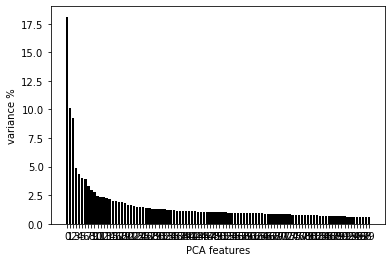

In [79]:
import matplotlib.pyplot as plt
plt.bar(fea, pca.explained_variance_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(fea)
# Save components to a DataFramePCA_components = pd.DataFrame(principalComponents)

pca_com = pd.DataFrame(pc)
pca_com

Text(0, 0.5, 'pca 2')

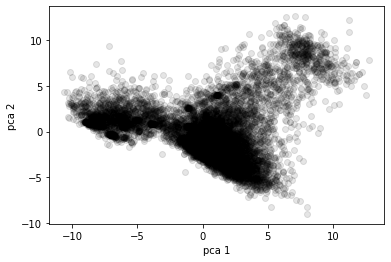

In [82]:
import seaborn as sns
plt.scatter(pca_com[0], pca_com[1], alpha=.1, color='black')
plt.xlabel('pca 1')
plt.ylabel('pca 2')

[367669.9840836032, 239196.62519389292, 162364.90255300634, 118685.89001181655, 91725.75338981373, 71797.02773585994, 63055.70085860803, 56819.25113409456, 51006.6863704205, 46905.880200120766, 43416.12914051442, 40030.807356092264, 37197.838167982045, 34499.62848160207, 32663.883152456274, 30808.862149800803, 29218.663555933294, 27805.843128363485, 26570.97621074926]


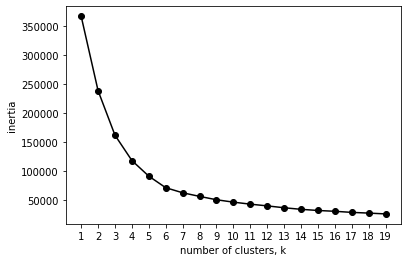

In [86]:
inertias = []
ks = range(1, 20)
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_com.iloc[:, :3])
    inertias.append(model.inertia_)
print(intertias)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()